In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

In [5]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

X_train /= 255
X_test /= 255

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [18]:
#모델 설계
# method 1
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(256, activation='relu')(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 모델 컴파일
loss= tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(lr=0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=metric)

In [10]:
# 베스트 모델 저장을 위한 디렉토리 선언
MODEL_DIR = './MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

## 저장한 모델의 주소와 이름.
modelpath="./MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [12]:
import math

def step_decay(epoch):
    initial_rate = 0.001
    drop = 0.98
    epochs_drop = 50.0
    lrate = initial_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [16]:
## 사용할 callback 함수 선언.
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True),
    tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)
]
# 모델의 실행
#  validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test,Y_test), callbacks=callbacks_list)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
1199/1200 [============================>.] - ETA: 0s - loss: 0.0064 - categorical_accuracy: 0.9979
Epoch 1: val_loss improved from inf to 0.08663, saving model to ./MNIST_model/01-0.0866.hdf5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0064 - categorical_accuracy: 0.9979 - val_loss: 0.0866 - val_categorical_accuracy: 0.9828 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
1198/1200 [============================>.] - ETA: 0s - loss: 0.0043 - categorical_accuracy: 0.9986
Epoch 2: val_loss did not improve from 0.08663
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0043 - categorical_accuracy: 0.9986 - val_loss: 0.0913 - val_categorical_accuracy: 0.9826 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
1196/1200 [============================>.] - ETA: 0s - loss: 0.0037 - categorical_accuracy: 0.9

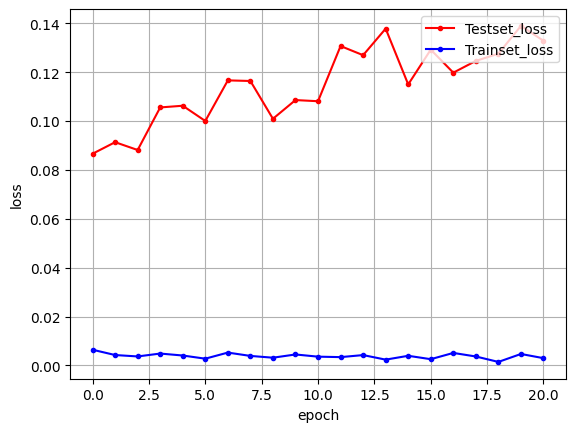

In [17]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()